In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df=pd.read_csv('Train_SU63ISt.csv',index_col=1)

In [3]:
train_df

,ID,Count
Datetime,,
25-08-2012 00:00,0,8
25-08-2012 01:00,1,2
25-08-2012 02:00,2,6
25-08-2012 03:00,3,2
25-08-2012 04:00,4,2
...,...,...
25-09-2014 19:00,18283,868
25-09-2014 20:00,18284,732
25-09-2014 21:00,18285,702


In [4]:
idx=pd.to_datetime(train_df.index).to_period("H")
train_df.index=idx

In [5]:
train_df

,ID,Count
Datetime,,
2012-08-25 00:00,0,8
2012-08-25 01:00,1,2
2012-08-25 02:00,2,6
2012-08-25 03:00,3,2
2012-08-25 04:00,4,2
...,...,...
2014-09-25 19:00,18283,868
2014-09-25 20:00,18284,732
2014-09-25 21:00,18285,702


In [6]:
y_train=train_df['Count']

In [7]:
type(y_train)

pandas.core.series.Series

In [8]:
y_train.index

PeriodIndex(['2012-08-25 00:00', '2012-08-25 01:00', '2012-08-25 02:00',
             '2012-08-25 03:00', '2012-08-25 04:00', '2012-08-25 05:00',
             '2012-08-25 06:00', '2012-08-25 07:00', '2012-08-25 08:00',
             '2012-08-25 09:00',
             ...
             '2014-09-25 14:00', '2014-09-25 15:00', '2014-09-25 16:00',
             '2014-09-25 17:00', '2014-09-25 18:00', '2014-09-25 19:00',
             '2014-09-25 20:00', '2014-09-25 21:00', '2014-09-25 22:00',
             '2014-09-25 23:00'],
            dtype='period[H]', name='Datetime', length=18288)

In [9]:
y_train

Datetime
2012-08-25 00:00      8
2012-08-25 01:00      2
2012-08-25 02:00      6
2012-08-25 03:00      2
2012-08-25 04:00      2
                   ... 
2014-09-25 19:00    868
2014-09-25 20:00    732
2014-09-25 21:00    702
2014-09-25 22:00    580
2014-09-25 23:00    534
Freq: H, Name: Count, Length: 18288, dtype: int64

In [10]:
forecaster=AutoETS(auto=True,sp=24)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                  Count   No. Observations:                18288
Model:                       ETS(MAM)   Log Likelihood              -82915.149
Date:                Thu, 16 Nov 2023   AIC                         165890.297
Time:                        19:43:55   BIC                         166124.717
Sample:                    08-25-2012   HQIC                        165967.326
                         - 09-25-2014   Scale                            0.107
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.3354      0.004     75.730      0.000       0.327       0.344
smoothing_trend      3.354e-05   1.85e-05      1.809      0.070   -2.79e-06    6.99e-05
smoothing_season

In [11]:
y_test=pd.read_csv('Test_0qrQsBZ.csv',index_col=1)

In [12]:
idx=pd.to_datetime(y_test.index).to_period("H")
y_test.index=idx

In [13]:
fh=ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['2014-09-26 00:00', '2014-09-26 01:00', '2014-09-26 02:00',
             '2014-09-26 03:00', '2014-09-26 04:00', '2014-09-26 05:00',
             '2014-09-26 06:00', '2014-09-26 07:00', '2014-09-26 08:00',
             '2014-09-26 09:00',
             ...
             '2015-04-26 14:00', '2015-04-26 15:00', '2015-04-26 16:00',
             '2015-04-26 17:00', '2015-04-26 18:00', '2015-04-26 19:00',
             '2015-04-26 20:00', '2015-04-26 21:00', '2015-04-26 22:00',
             '2015-04-26 23:00'],
            dtype='period[H]', name='Datetime', length=5112, is_relative=False)

In [14]:
y_test

,ID
Datetime,
2014-09-26 00:00,18288
2014-09-26 01:00,18289
2014-09-26 02:00,18290
2014-09-26 03:00,18291
2014-09-26 04:00,18292
...,...
2015-04-26 19:00,23395
2015-04-26 20:00,23396
2015-04-26 21:00,23397


In [15]:
fh=ForecastingHorizon(y_test.index,is_relative=False)

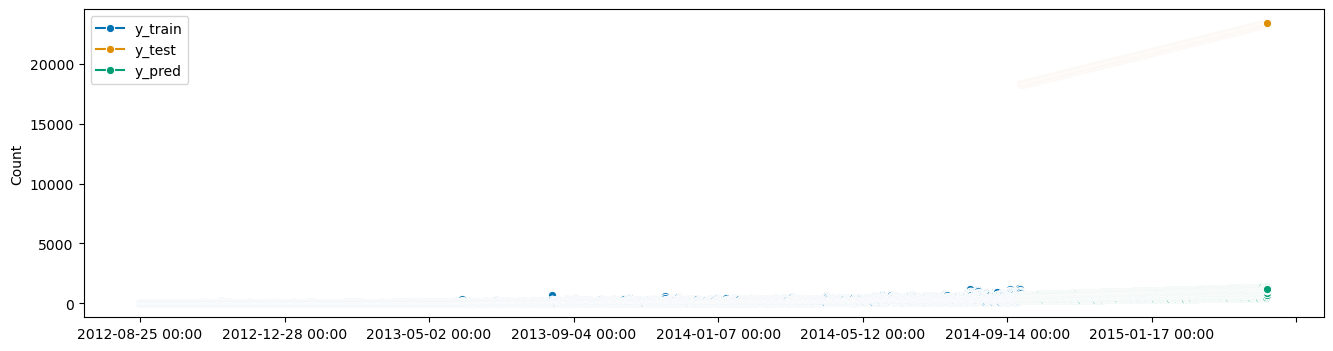

In [16]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=['y_train','y_test','y_pred'])
plt.show()